# QB Speed?

Based on obtained source code

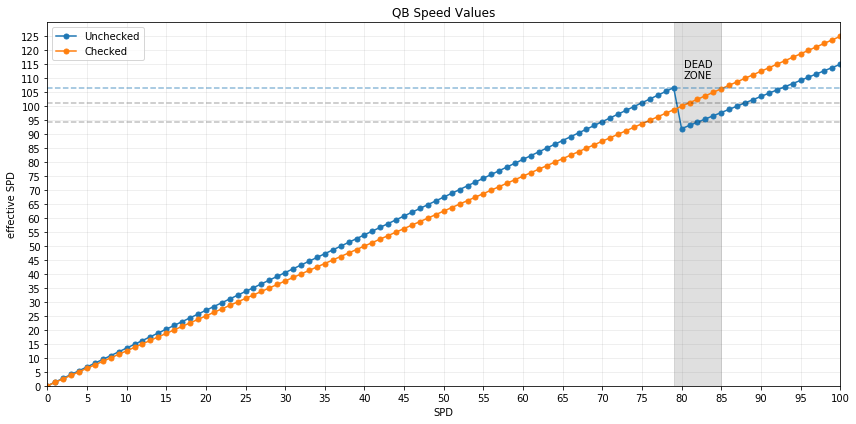

In [1]:
import numpy as np
import matplotlib.pyplot as plt

iRange = np.arange(0,101,1)
x = 1

def speedRating(i,x,box):
    if box == True:
        x *= i*1.25
    elif i < 80:
        x *= i*1.35
    else:
        x *= i*1.15
#     if i > 45:
#         x *= i*0.85
#     if i > 25:
#         x *= i*0.9
#     if i > 15:
#         x *= i*0.97
    return x

skillUNCHECKED = np.array([speedRating(i,x,False) for i in iRange])
skillCHECKED = np.array([speedRating(i,x,True) for i in iRange])

plt.figure(figsize=(12,6),facecolor='w')
plt.xticks(np.arange(0,105,5))
plt.yticks(np.arange(0,130,5))
plt.grid(color='gray', linestyle='-', linewidth=0.5,alpha=0.25)
plt.title('QB Speed Values')
plt.xlabel('SPD')
plt.ylabel('effective SPD')
plt.xlim(0,100)
plt.ylim(0,130)

plt.plot(iRange,skillUNCHECKED,label='Unchecked',marker='o',markersize=5)
plt.plot(iRange,skillCHECKED,label='Checked',marker='o',markersize=5)
# plt.axvline(79,c='k',ls='--',alpha=0.25)
plt.axvspan(79,85,color='gray',alpha=0.25)
plt.text(80.25,110,"DEAD\nZONE")
plt.axhline(skillUNCHECKED[79],ls='--',alpha=0.5)
# plt.text(1,skillUNCHECKED[79]+1.5,'79 SPD Unchecked ~ 85 SPD Checked')
plt.axhline(skillUNCHECKED[75],c='k',ls='--',alpha=0.25)
# plt.text(1,skillUNCHECKED[75]-4,'75 SPD Unchecked ~ 82 SPD Checked')
plt.axhline(skillUNCHECKED[70],c='k',ls='--',alpha=0.25)
# plt.text(1,skillUNCHECKED[70]-4,'70 SPD Unchecked ~ 75 SPD Checked')

plt.legend()
plt.tight_layout()
plt.show()

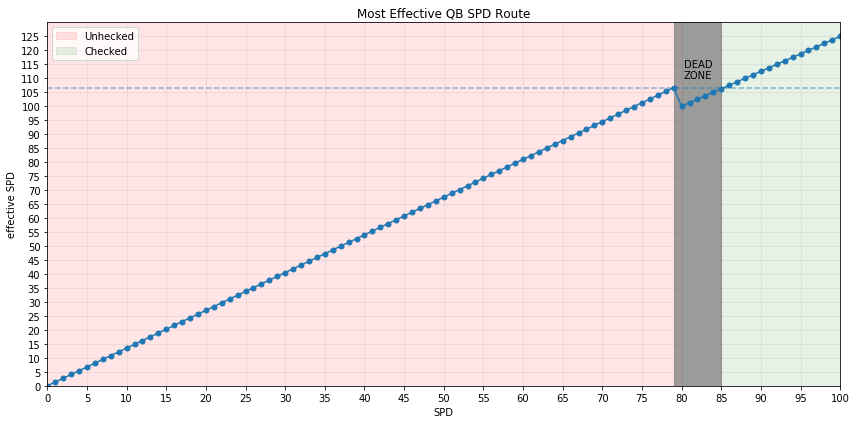

In [2]:
maxEffSPD = np.maximum(skillCHECKED,skillUNCHECKED)

plt.figure(figsize=(12,6),facecolor='w')
plt.xticks(np.arange(0,105,5))
plt.yticks(np.arange(0,130,5))
plt.grid(color='gray', linestyle='-', linewidth=0.5,alpha=0.25)
plt.title('Most Effective QB SPD Route')
plt.xlabel('SPD')
plt.ylabel('effective SPD')
plt.xlim(0,100)
plt.ylim(0,130)

# plt.plot(iRange,skillUNCHECKED,label='Unchecked',marker='o',markersize=5)
# plt.plot(iRange,skillCHECKED,label='Checked',marker='o',markersize=5)
plt.plot(iRange,maxEffSPD,marker='o',markersize=5)

# plt.axvline(79,c='k',ls='--',alpha=0.25)
plt.axvspan(0,80,color='r',alpha=0.1,label='Unhecked')
plt.axvspan(80,100,color='g',alpha=0.1,label='Checked')
plt.axvspan(79,85,color='gray',alpha=0.75)
plt.text(80.25,110,"DEAD\nZONE")
plt.axhline(skillUNCHECKED[79],ls='--',alpha=0.5)
# plt.text(1,skillUNCHECKED[79]+1.5,'79 SPD Unchecked ~ 85 SPD Checked')
# plt.axhline(skillUNCHECKED[75],c='k',ls='--',alpha=0.25)
# plt.text(1,skillUNCHECKED[75]-4,'75 SPD Unchecked ~ 82 SPD Checked')
# plt.axhline(skillUNCHECKED[70],c='k',ls='--',alpha=0.25)
# plt.text(1,skillUNCHECKED[70]-4,'70 SPD Unchecked ~ 75 SPD Checked')

plt.legend()
plt.tight_layout()
plt.show()

In [3]:
skillCHECKED[86] - skillUNCHECKED[79]

0.8499999999999943

In [4]:
skillCHECKED[90] - skillUNCHECKED[79]

5.849999999999994

In [5]:
skillCHECKED[90] - skillUNCHECKED[75]

11.25

In [6]:
skillCHECKED[90] - skillUNCHECKED[70]

18.0

## QB SPD Analysis

### Few basic takeaways
* 79 SPD is about the same as a mobile QB at 85 SPD, and a non-mobile at 93 SPD
* For anything *below* 80 SPD, it makes **no sense** to have the box checked.
* Anything between 79 SPD and 85 SPD (checked) is a "dead zone", where adding SPD only hurts you. To make that jump to 86 SPD is 65 TPE!
* This is *across the board*, though obviously it helps more if you run Spread as the QB runs the ball more often.

### Possible Suggestions
There's no real reason that non-mobile QBs should be more effective at running the ball than mobile QBs - so here might be a re-worked solution:
* Mobile maximum SPD: **90**
* Game Manager maximum SPD: **75** (equivalent to 82 checked, effectively 11.25 SPD below max Mobile)
* Gunslinger & Pocket Passer maximum SPD: **70** (equivalent to 75 checked, effectively 18 SPD below max Mobile)

It may also be worth re-tooling the update scale for *Mobile QBs* so that 80-85 is only 5 TPE rather than 10 TPE. This would reduce the "dead zone" to 35 TPE rather than 65 TPE. The benefit is still super small, so maybe even going for the radical change of making that step **5 TPE total** is possible.